# <font color="red"> Семинар 6 - Аудиторная работа </font>

# Удаление выбросов и NA. Основные распределения статистики.

__Направление:__ Прикладная математика и информатика 

__Дисциплина:__ Теория вероятностей и математическая статистика


__К.ф.м.н., доцент кафедры математики и анализа данных:__ Шамраева В.В. 

__e-mail__: VVShamraeva@fa.ru

Финансовый университет при правительстве РФ, 2024 г. 

In [1]:
# pip install pandas

In [2]:
import pandas as pd  # Библиотека pandas для работы с индексированными таблицами
import numpy as np
import matplotlib.pyplot as plt  
import scipy.stats as sts

In [3]:
# Прочитаем книгу 'Удаление_NA_Out.xlsx' с исходными данными

df = pd.read_excel('Удаление_NA_Out.xlsx')
df

,A,B,C,D,E,F,G,H
0,196.92971,203.29,-173.6,222.553,200.248,Jun,E,No
1,150.50897,198.23,-225.9,224.344,NaN,Apr,C,Yes
2,NaN,260.40,-170.4,245.684,199.434,Mch,B,No
3,196.34805,217.22,-232.5,225.249,157.329,Feb,A,No
4,199.53462,205.53,-177.4,243.334,227.758,Mch,E,No
...,...,...,...,...,...,...,...,...
1995,180.66118,218.83,-212.7,NaN,204.273,NaN,C,NaN
1996,197.28935,NaN,-203.9,NaN,197.449,NaN,NaN,NaN
1997,160.83379,NaN,-202.8,NaN,193.889,NaN,NaN,NaN
1998,216.67462,NaN,NaN,NaN,204.405,NaN,NaN,NaN


In [4]:
df.A

0       196.92971
1       150.50897
2             NaN
3       196.34805
4       199.53462
          ...    
1995    180.66118
1996    197.28935
1997    160.83379
1998    216.67462
1999    144.18117
Name: A, Length: 2000, dtype: float64

In [5]:
def remove_outlier(col_name):
    print('N_with_NA=', col_name.size)
    print('N_NA=', col_name.isna().sum())
    col_name = col_name.dropna()
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    RQ = Q3-Q1 #Interquartile range
    IRQ=1.5*RQ
    Xst_min  = Q1-IRQ
    Xst_max = Q3+IRQ
    print('Первый квартиль Q1 выборки А=:', Q1)
    print('Третий квартиль Q3 выборки А=:', Q3)
    print('RQ=',RQ)
    print('Xst_min=',Xst_min)
    print('Xst_max=',Xst_max)
    print('N_without_NA=',col_name.count())
    df_out =col_name[(Xst_min <= col_name) & (col_name <= Xst_max)]
    return df_out

In [6]:
df_out_A=remove_outlier(df.A)
df_out_A

N_with_NA= 2000
N_NA= 30
Первый квартиль Q1 выборки А=: 175.7585275
Третий квартиль Q3 выборки А=: 205.49009
RQ= 29.731562499999995
Xst_min= 131.16118375000002
Xst_max= 250.08743375
N_without_NA= 1970


0       196.92971
1       150.50897
3       196.34805
4       199.53462
5       170.20138
          ...    
1995    180.66118
1996    197.28935
1997    160.83379
1998    216.67462
1999    144.18117
Name: A, Length: 1950, dtype: float64

In [7]:
# Выведем описательную статистику

df.A.describe()

count    1970.000000
mean      190.566193
std        25.147779
min        72.421430
25%       175.758528
50%       191.025150
75%       205.490090
max       397.343005
Name: A, dtype: float64

In [8]:
df_A=np.array(df.A[df.A.isna()== False])
df_out_A=np.array(remove_outlier(df.A))

N_with_NA= 2000
N_NA= 30
Первый квартиль Q1 выборки А=: 175.7585275
Третий квартиль Q3 выборки А=: 205.49009
RQ= 29.731562499999995
Xst_min= 131.16118375000002
Xst_max= 250.08743375
N_without_NA= 1970


In [9]:
mr=len(df_A)
mr

1970

In [10]:
mr_out=len(df_out_A)
mr_out

1950

__Box plot__ состоит из коробки (поэтому он и называется __box plot__), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (__Q1__) и 75% (__Q3__) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток 
$$(Q_1 - 1.5*IQR, Q_3 + 1.5*IQR),$$
где $IQR = Q_3 - Q_1$ — интерквартильный размах. Точками на графике обозначаются выбросы (__outliers__) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

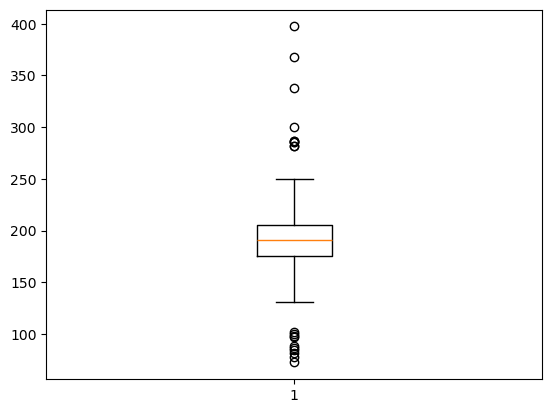

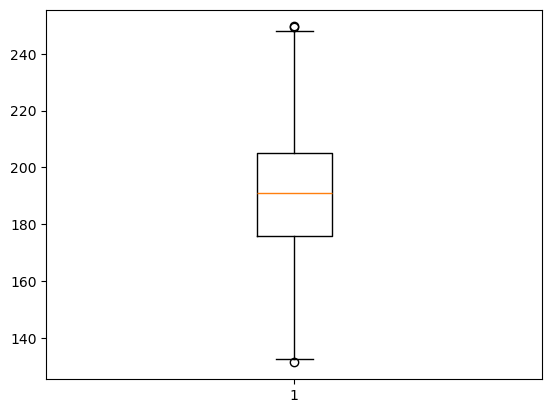

In [11]:
# Creating plot
plt.boxplot(df_A)

# show plot
plt.show()

plt.boxplot(df_out_A)

# show plot
plt.show()

In [12]:
# Создадим в этой книге лист "А (Python)" и перенесём на него данные столбца А с листа "Данные"

from openpyxl import load_workbook

wb = load_workbook('Удаление_NA_Out.xlsx')
wb.create_sheet('А (Python)')

ws1 = wb['Данные']
ws2 = wb['А (Python)']
mr = ws1.max_row

for i in range (1, mr + 1):
    c = ws1.cell(row = i, column = 1) 
    ws2.cell(row = i, column = 1).value = c.value

In [13]:
# Разместим выборку без NA на лист "А (Python)", начиная со 2-ой строки в 3-ем столбце

ws2.cell(row = 1, column = 3).value="Без NA"


In [14]:
for i in range (1, len(df_A)+1 ):
    ws2.cell(row = i+1, column = 3).value = df_A[i-1]

In [15]:
# Разместим выборку без NA и выбросов на лист "А (Python)", начиная со 2-ой строки в 5-ем столбце

ws2.cell(row = 1, column = 5).value="Без NA и выбросов"
for i in range (1, mr_out+1 ):
    ws2.cell(row = i+1, column = 5).value = sorted(df_out_A)[i-1]
    
wb.save('Удаление_NA_Out.xlsx')

In [16]:
wb.close()

In [17]:
df.F

0       Jun
1       Apr
2       Mch
3       Feb
4       Mch
       ... 
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
Name: F, Length: 2000, dtype: object

In [18]:
df.F.value_counts()

F
Feb    788
Jan    387
Apr    305
Jun    295
Mch    179
Name: count, dtype: int64

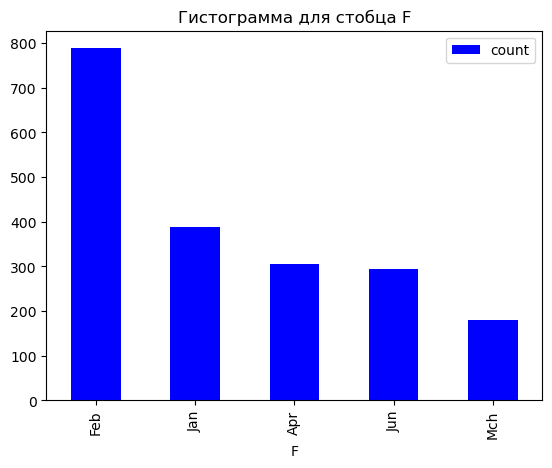

In [19]:
df.F.value_counts().plot(kind='bar',color = 'b')
plt.legend()
plt.title('Гистограмма для стобца F');
# show plot
plt.show()

## Вычисление квантилей

In [20]:
alpha=0.05
gamma=1-alpha

In [21]:
# Квантиль из нормального распределения

q1_norm_alpha=sts.norm.ppf(alpha/2)
print('q1_norm_alpha=',q1_norm_alpha)
q1_norm_gamma=sts.norm.ppf((1-gamma)/2)
print('q1_norm_gamma=',q1_norm_gamma)
q2_norm_alpha=sts.norm.ppf(1-alpha/2)
print('q2_norm_alpha=',q2_norm_alpha)
q2_norm_gamma=sts.norm.ppf((1+gamma)/2)
print('q2_norm_gamma=',q2_norm_gamma)

q1_norm_alpha= -1.9599639845400545
q1_norm_gamma= -1.959963984540054
q2_norm_alpha= 1.959963984540054
q2_norm_gamma= 1.959963984540054


In [22]:
print('q2_norm_alpha=',sts.norm.isf(alpha/2))

q2_norm_alpha= 1.9599639845400545


In [23]:
# Квантиль из распределения Стьюдента

q1_t_alpha=sts.t.ppf(alpha/2, 3) 
print('q1_t_alpha=',q1_t_alpha)
q1_t_gamma=sts.t.ppf((1-gamma)/2,3)
print('q1_t_gamma=',q1_t_gamma)
q2_t_alpha=sts.t.ppf(1-alpha/2, 3) 
print('q2_t_alpha=',q2_t_alpha)
q2_t_gamma=sts.t.ppf((1+gamma)/2,3)
print('q2_t_gamma=',q2_t_gamma)

q1_t_alpha= -3.1824463052842638
q1_t_gamma= -3.182446305284263
q2_t_alpha= 3.182446305284263
q2_t_gamma= 3.182446305284263


In [24]:
print('q2_t_alpha=',sts.t.isf(alpha/2,3))

q2_t_alpha= 3.1824463052842638


In [25]:
# Квантиль из распределения Хи^2

q1_chi2_alpha=sts.chi2.ppf(alpha/2, 5) 
print('q1_chi2_alpha=',q1_chi2_alpha)
q1_chi2_gamma=sts.chi2.ppf((1-gamma)/2,5)
print('q1_chi2_gamma=',q1_chi2_gamma)
q2_chi2_alpha=sts.chi2.ppf(1-alpha/2, 5) 
print('q2_chi2_alpha=',q2_chi2_alpha)
q2_chi2_gamma=sts.chi2.ppf((1+gamma)/2,5)
print('q2_chi2_gamma=',q2_chi2_gamma)

q1_chi2_alpha= 0.8312116134866625
q1_chi2_gamma= 0.831211613486663
q2_chi2_alpha= 12.832501994030027
q2_chi2_gamma= 12.832501994030027


In [26]:
# Квантиль из распределения Фишера

q1_f_alpha=sts.f.ppf(alpha/2, 4,7) 
print('q1_f_alpha=',q1_f_alpha)
q1_f_gamma=sts.f.ppf((1-gamma)/2,4,7)
print('q1_f_gamma=',q1_f_gamma)
q2_f_alpha=sts.f.ppf(1-alpha/2, 4,7) 
print('q2_f_alpha=',q2_f_alpha)
q2_f_gamma=sts.f.ppf((1-gamma)/2,4,7)
print('q2_f_gamma=',q2_f_gamma)

q1_f_alpha= 0.11020326820103767
q1_f_gamma= 0.11020326820103767
q2_f_alpha= 5.5225943453085495
q2_f_gamma= 0.11020326820103767


In [27]:
df_Q=pd.DataFrame({
    "Распределение": ['N(0,1)'
                 , 'Стьюдент (ст св 3)'
                 , "ХИ^2 (ст св 5)"
                 , "Фишер (ст св 1=4, ст св 2=7)"]
    , 'q1_alpha': [q1_norm_alpha,q1_t_alpha,q1_chi2_alpha,q1_f_alpha]
    , 'q1_gamma': [q1_norm_gamma,q1_t_gamma,q1_chi2_gamma,q1_f_gamma]
    , 'q2_alpha': [q2_norm_alpha,q2_t_alpha,q2_chi2_alpha,q2_f_alpha]
    , 'q2_gamma': [q2_norm_gamma,q2_t_gamma,q2_chi2_gamma,q2_f_gamma]
})
df_Q

,Распределение,q1_alpha,q1_gamma,q2_alpha,q2_gamma
0,"N(0,1)",-1.959964,-1.959964,1.959964,1.959964
1,Стьюдент (ст св 3),-3.182446,-3.182446,3.182446,3.182446
2,ХИ^2 (ст св 5),0.831212,0.831212,12.832502,12.832502
3,"Фишер (ст св 1=4, ст св 2=7)",0.110203,0.110203,5.522594,0.110203


# Привести необходимую теоретическую справку (например плотность распределения, разные интересные свойства (можно использовать любые источники) для нормального распределения с параметрами $a$ и $\sigma$

Распределение вероятностей непрерывной случайной величины $X$ называется __нормальным__ или __распределением Гаусса с параметрами $a$ и $\sigma$ ($a\in\mathbb R$ и $\sigma>0$)__, если функция плотности вероятностей определяется следующим образом

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^2}{2\sigma^2}}.$$


Класс таких распределений обозначается через $N(a,\sigma)$.

Нормальное распределение вероятностей непрерывной случайной величины называется __нормированным__, если параметры распределения фиксируют следующим образом:
$$a = 0, \sigma = 1.$$



График функции плотности нормального распределения выглядит следующим образом:
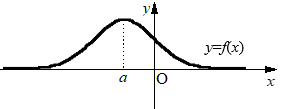




Этот график симметричен относительно прямой $x=a$  и имеет в точке $x=a$   единственный экстремум (максимум), равный  $\frac{1}{\sigma\sqrt{2\pi}}$. С уменьшением $\sigma$ этот график становится все более островершинным. Изменение $a$ при постоянном $\sigma$ не меняет форму графика, а вызывает лишь его смещение по оси абсцисс. 


Интегральная функция нормального распределения непрерывной случайной величины $X$:
$$F(x)=\Phi\left(\frac{x-a}{\sigma}\right)$$
и её график:
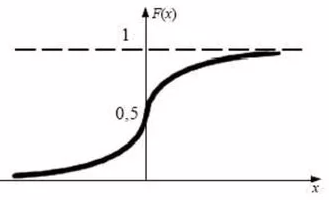

Функцию $$\Phi(x)=\frac{1}{\sigma\sqrt{2\pi}}\int\limits_{-\infty}^{\infty}e^{-\frac{t^2}{2}}dt$$  часто называют __интегралом вероятности Гаусса__. 


Для $\Phi_0(x)=\frac{1}{\sigma\sqrt{2\pi}}\int\limits_{0}^{\infty}e^{-\frac{t^2}{2}}dt$ (__функция Лапласа__) справедливо такое соотношение: 
$$\Phi(x)=0,5+\Phi_0(x).$$


Числовые характеристики:
$$E(X)=a,\quad Var(X)=\sigma^2.$$

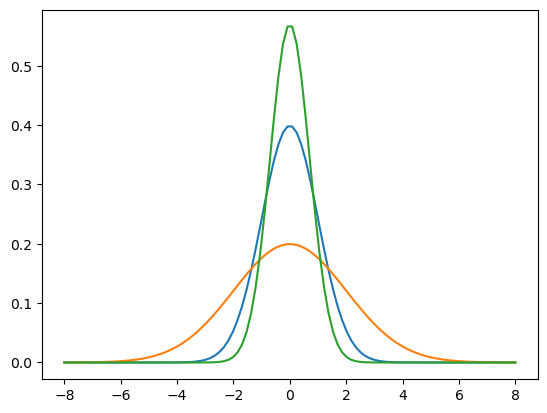

In [28]:
x = np.linspace(-8, 8, 100)
for sigma in 1, 2, 0.7:
    y = sts.norm(0,sigma).pdf(x)
    plt.plot(x, y)
plt.show()

In [29]:
mu=5
sigma=2
X=sts.norm(mu,sigma)

## Функция распределения нормального закона (Cumulative distribution function (CDF)).

F(q) =P(X ⩽ q)

В Excel   =НОРМ.РАСП(2,5;5;2;1)

In [30]:
'''CDF (Cumulative distribution function) Функция распределения нормального закона)'''


print("P(X<=2.5)=F(2.5)=",X.cdf(2.5)) # 0.10564977366685535

P(X<=2.5)=F(2.5)= 0.10564977366685535


## Функция "выживания'' (Survival function (sf))

P(X ⩾ q) = 1 − P(X < q)

Найти P(X ⩾ 7.5)

In [31]:
print("P(X>=7.5)=1-F(7.5)=",X.sf(7.5))

P(X>=7.5)=1-F(7.5)= 0.10564977366685535


## Функция процентной точки (Percent point function(PPF) (inverse of cdf — percentiles).)

Найти q, так чтобы P(X ⩽ q) = 0.05

В Excel =НОРМ.ОБР(0,05;5;2)

In [32]:
print("q=F^(-1)(0.05)=",X.ppf(0.05))

q=F^(-1)(0.05)= 1.7102927460970543


In [33]:
X.ppf(0.10564977366685535)

2.5000000000000013

## Функция обратная к функции выживания (Inverse survival function (inverse of sf)) (isf).

Найти q, так чтобы P(X ⩾ q) = 0.05

In [34]:
X.isf(0.05)

8.289707253902947

In [35]:
X.ppf(1-0.05)

8.289707253902945

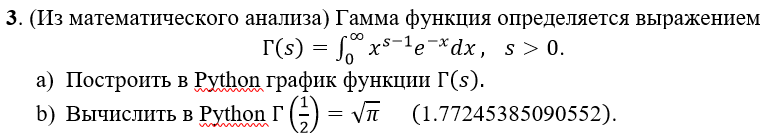

In [36]:
import sympy as sp

In [37]:
x=sp.symbols('x')

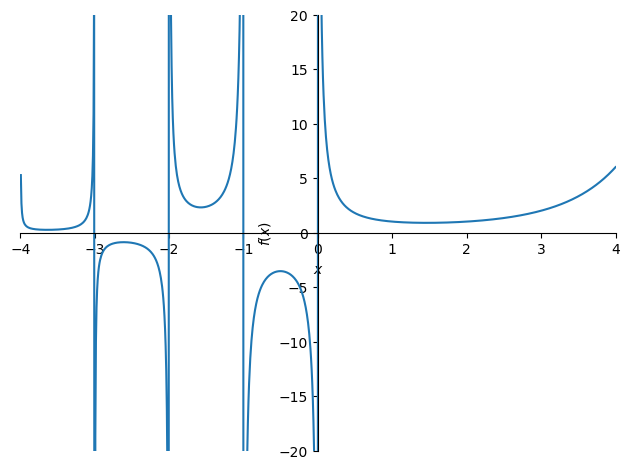

In [38]:
sp.plot(sp.gamma(x),(x,-4,4),xlim=(-4,4),ylim=(-20,20))

In [39]:
print('Г(1/2)=',sp.gamma(1/2))

Г(1/2)= 1.77245385090552


In [40]:
sp.sqrt(sp.pi)

sqrt(pi)

In [41]:
float(sp.sqrt(sp.pi))

1.772453850905516